#**MIDTERM EXAM**
**Time Series Analysis and Forecasting with
ARIMA Model**

**MILLARE,LUCKY OWELL U.**

**BSCS-3B**

#**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#**1. DATA CLEANING AND PREPARATION**

In [ ]:
# LOAD DATASET
df = pd.read_csv('googleplaystore.csv')

# Handle missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert fields to numerical format
df['Reviews'] = df['Reviews'].astype(int)
df['Size'] = df['Size'].str.replace('M', '').str.replace('k', '').replace('Varies with device', np.nan).astype(float)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
df['Price'] = df['Price'].str.replace('$', '').astype(float)

#**2. EXPLORATORY DATA ANALYSIS(EDA)**

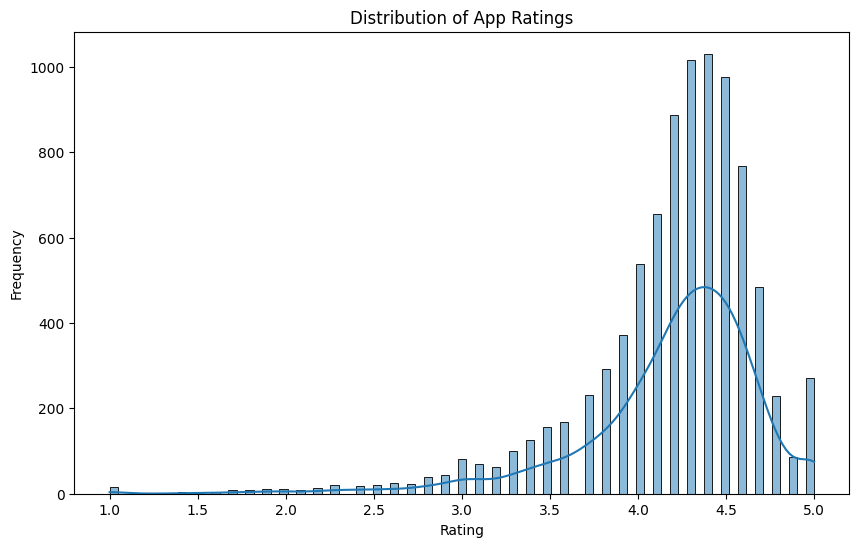

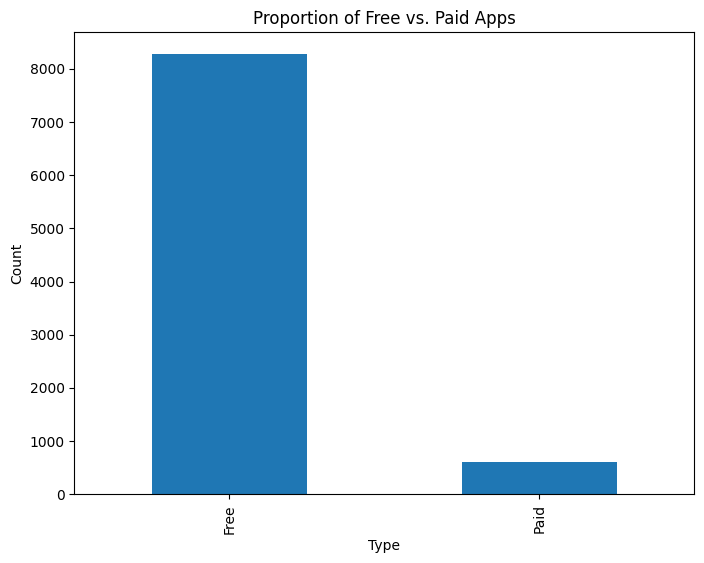

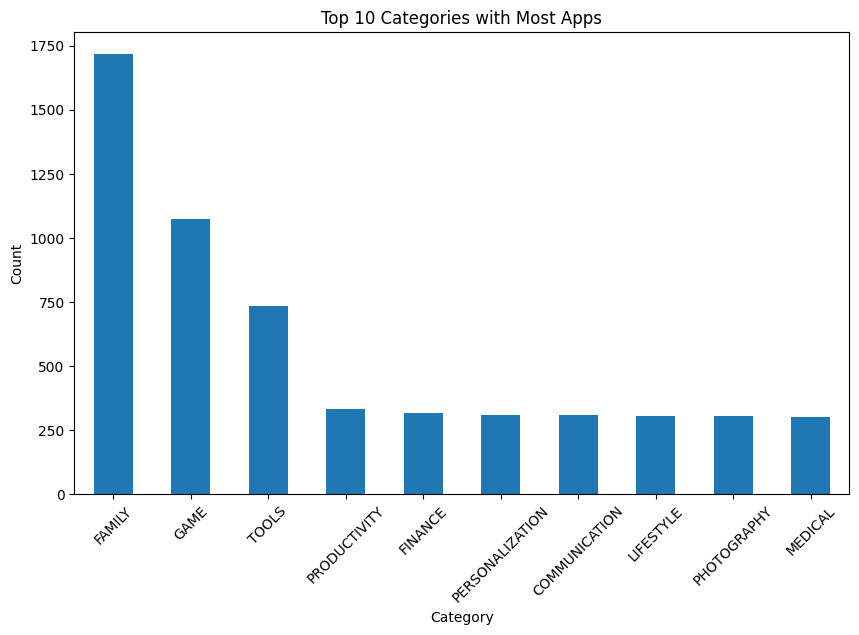

In [ ]:
# Visualize distribution of app ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Analyze proportion of free vs. paid apps
types = df['Type'].value_counts()
# Plotting free vs. paid apps
plt.figure(figsize=(8, 6))
types.plot(kind='bar')
plt.title('Proportion of Free vs. Paid Apps')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Identify categories with the most apps
category = df['Category'].value_counts().head(10)
# Plotting top categories
plt.figure(figsize=(10, 6))
category.plot(kind='bar')
plt.title('Top 10 Categories with Most Apps')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#**3. CATEGORY ANALYSIS**

In [ ]:
category_analy = df.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'sum', 'App': 'count'})

#**4. RATING PREDICTION MODEL**

In [ ]:
# Split the data into training and testing sets
x = df[['Reviews', 'Size', 'Installs', 'Price']]
y = df['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build and evaluate the model
model = ARIMA(y_train.values, order=(5,1,0))
model_fit = model.fit()

# Forecasting on the testing data
forecast_steps = len(x_test)
predictions = model_fit.forecast(steps=forecast_steps)[0]

# Set the index of predictions to match the index of y_test
predictions = pd.Series(predictions, index=y_test.index)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.368074588549335


#**5. TREND ANALYSIS**

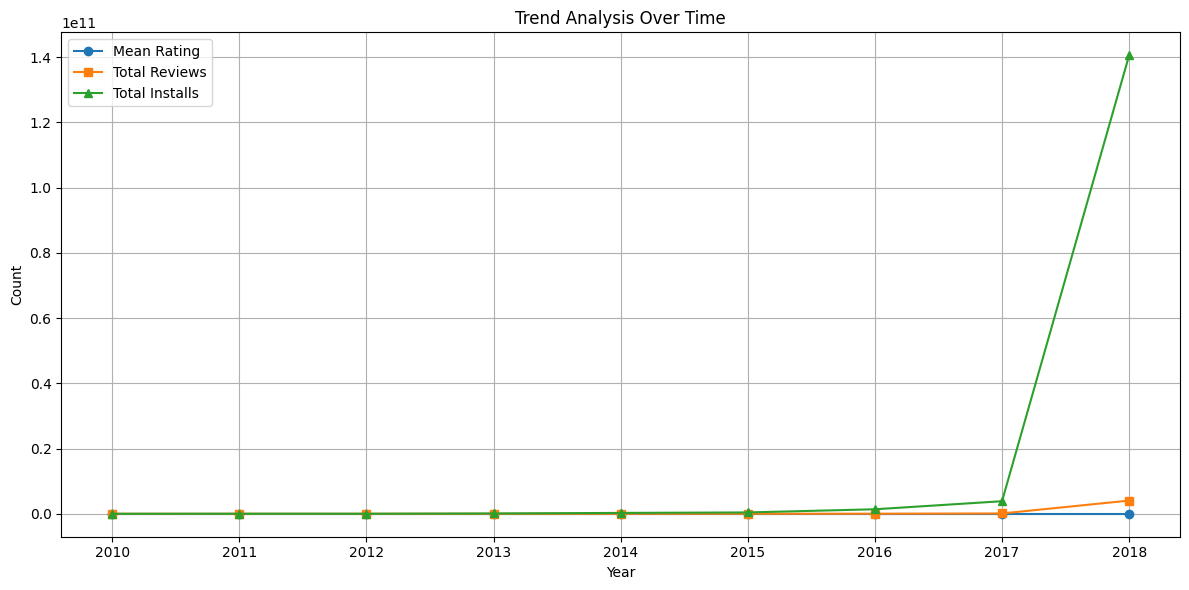

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Year'] = df['Last Updated'].dt.year
df['Month'] = df['Last Updated'].dt.month

# Group by year and calculate mean ratings, total reviews, and total installs
mean_ratings_year = df.groupby('Year')['Rating'].mean()
total_reviews_year = df.groupby('Year')['Reviews'].sum()
total_installs_year = df.groupby('Year')['Installs'].sum()

# Plot trends
plt.figure(figsize=(12, 6))

# Mean Rating Trend
plt.plot(mean_ratings_year.index, mean_ratings_year.values, label='Mean Rating', marker='o')

# Total Reviews Trend
plt.plot(total_reviews_year.index, total_reviews_year.values, label='Total Reviews', marker='s')

# Total Installs Trend
plt.plot(total_installs_year.index, total_installs_year.values, label='Total Installs', marker='^')

plt.title('Trend Analysis Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#**6. IMPACT OF REVIEWS ON RATINGS**

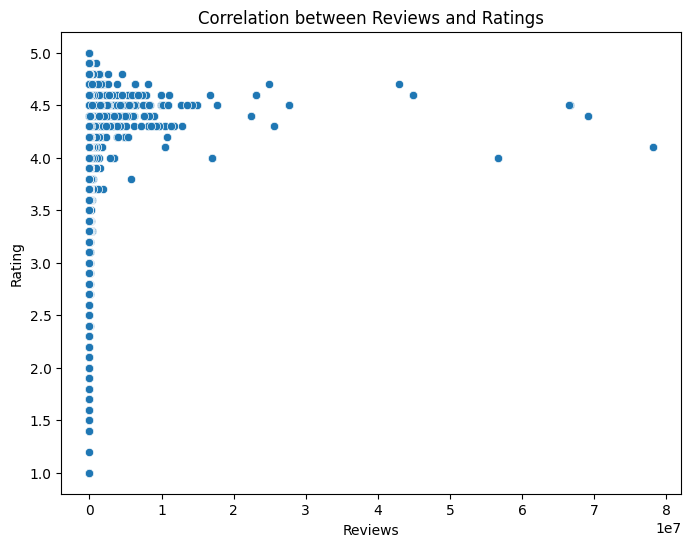

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('Correlation between Reviews and Ratings')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()